In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [63]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv.xls')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Basic Information: 
- BMI has approximately 201 missing values - will drop
- Target variable (stroke) is highly unbalanced (only 4.9% of people had a stroke) - may need to either over/undersample or do weight the classes
- Glucose Levels and BMI are significantly skewed (lots of outliers): May need to keep the data because the specific population is representative of the individuals who have a stroke 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [68]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [70]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [72]:
#Handling Missing Values 
df['bmi'].fillna(df['bmi'].median())

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [74]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

Visualizations:

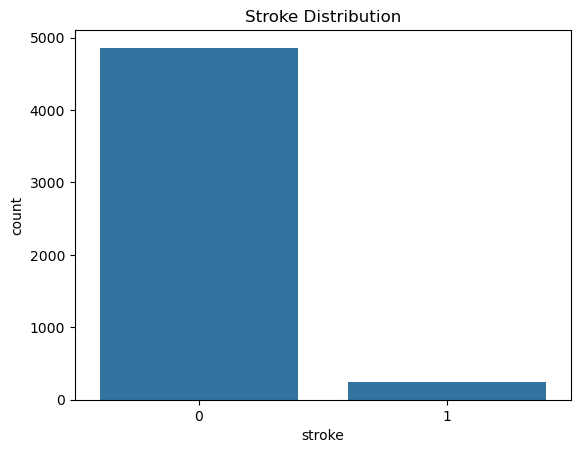

In [77]:
sns.countplot(x='stroke', data = df)
plt.title("Stroke Distribution")
plt.show()

Handling Outliers: 
- applying log transformation on extreme outliers to reduce variance 

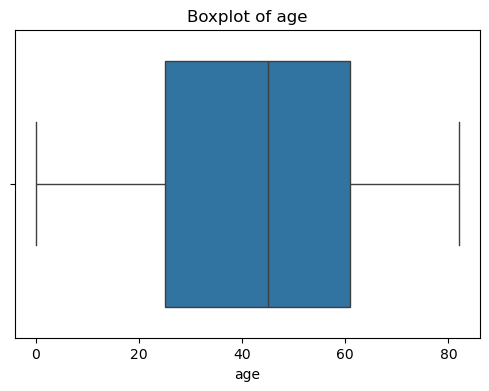

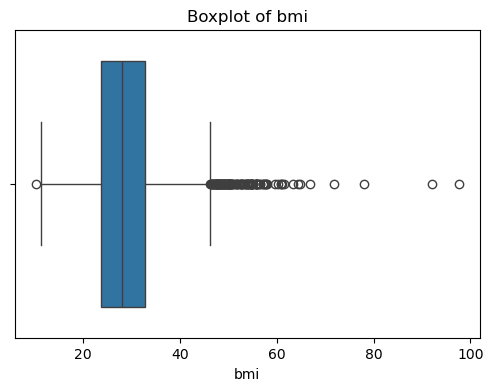

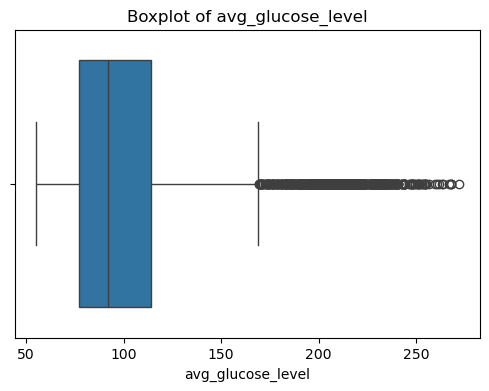

In [80]:
#age seems to have no outliers
#BMI: significant right skew, values < 45
#Glucose: significantly right skewed 
continous_cols = ['age', 'bmi', 'avg_glucose_level']
for col in continous_cols:
   plt.figure(figsize=(6,4))
   sns.boxplot(data=df, x=col)
   plt.title(f'Boxplot of {col}')
   plt.show()

In [82]:
for col in ['bmi', 'avg_glucose_level']:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.2f}")

Skewness of bmi: 1.09
Skewness of avg_glucose_level: 1.57


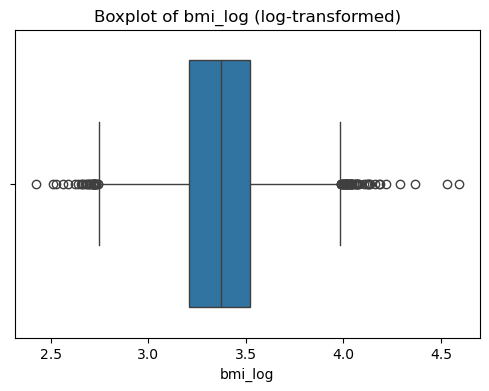

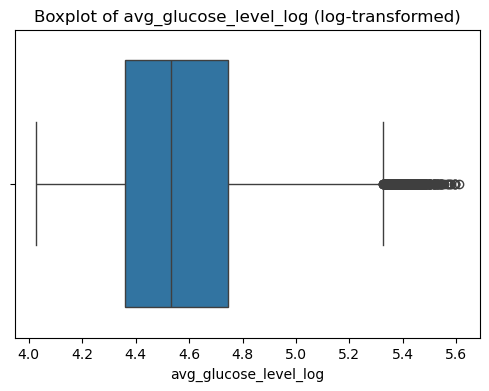

In [84]:
df['bmi_log'] = np.log1p(df['bmi'])
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])

for col in ['bmi_log', 'avg_glucose_level_log']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, data=df)
    plt.title(f"Boxplot of {col} (log-transformed)")
    plt.show()

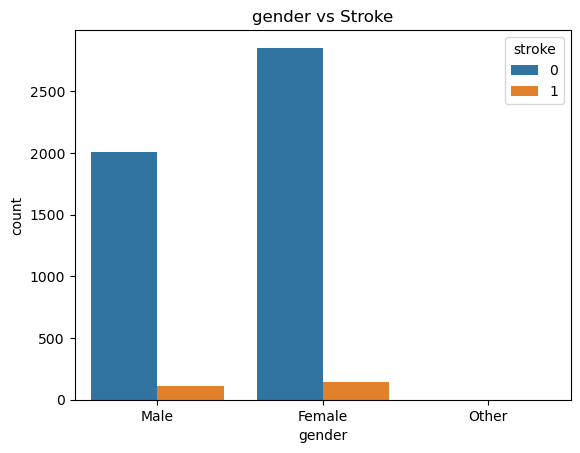

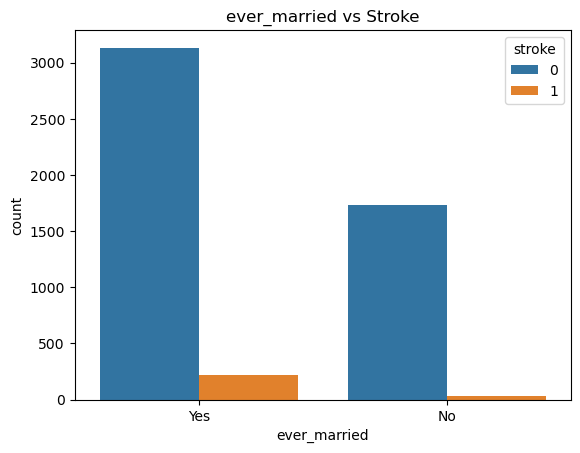

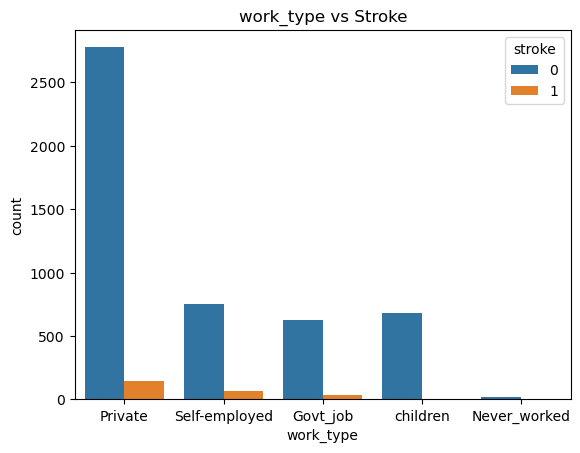

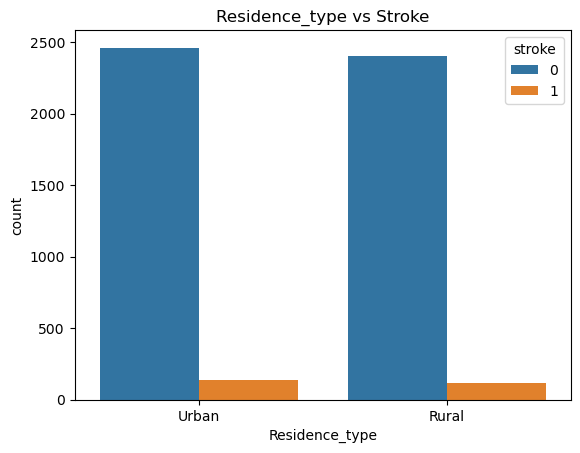

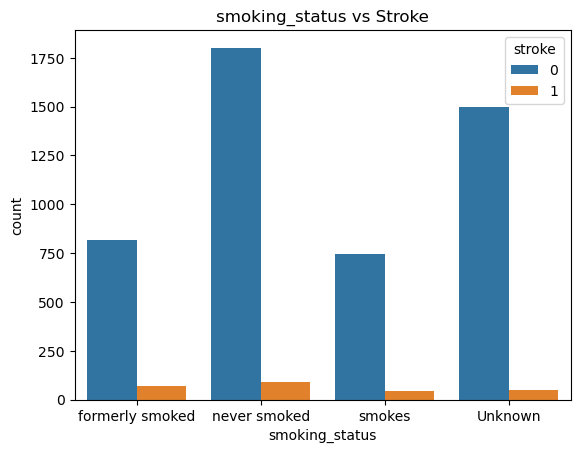

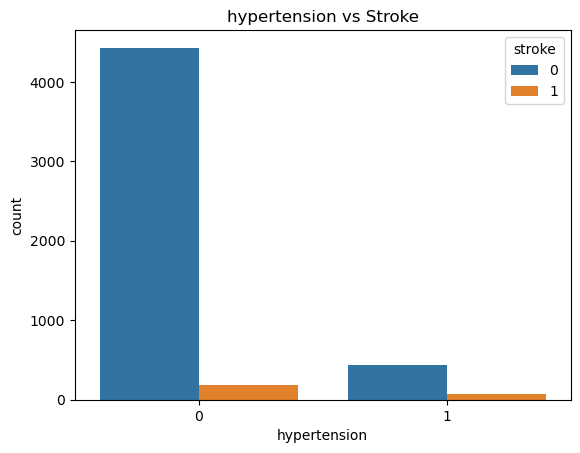

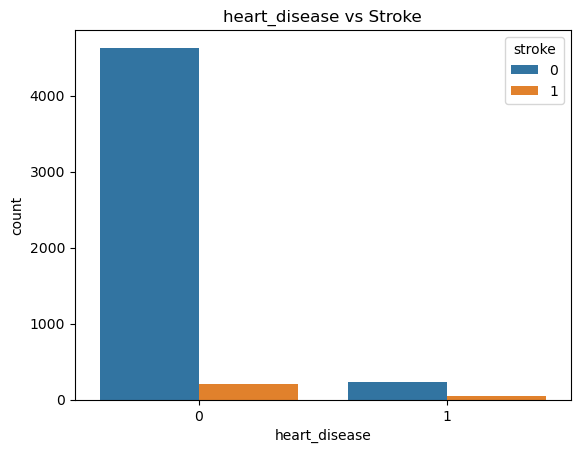

In [86]:
#Categorical Variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
for col in categorical_cols:
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f"{col} vs Stroke")
    plt.show()

In [88]:
for col in categorical_cols:
    s_proportions = df.groupby(col)['stroke'].mean()*100
    print(f"\nStroke percentage by {col}:\n{s_proportions}")


Stroke percentage by gender:
gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64

Stroke percentage by ever_married:
ever_married
No     1.650541
Yes    6.561288
Name: stroke, dtype: float64

Stroke percentage by work_type:
work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64

Stroke percentage by Residence_type:
Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64

Stroke percentage by smoking_status:
smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64

Stroke percentage by hypertension:
hypertension
0     3.967910
1    13.253012
Name: stroke, dtype: float64

Stroke percentage by heart_disease:
heart_disease
0     4.178734
1    17.028986
Name: stroke, dtype: float64


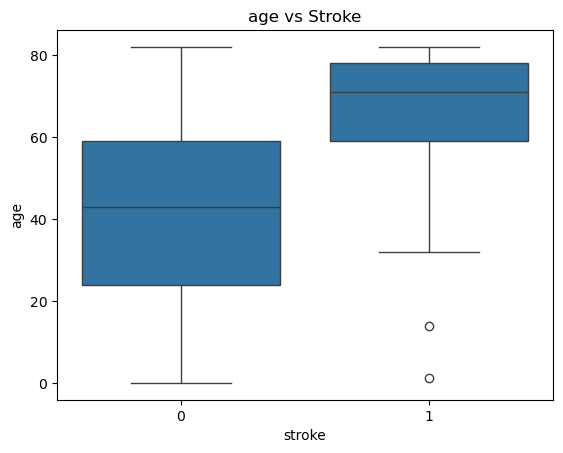

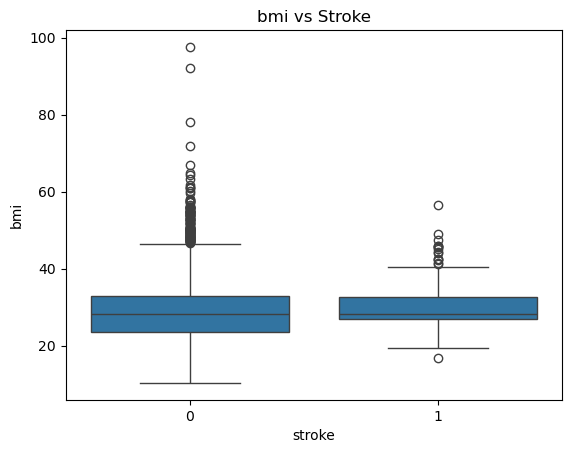

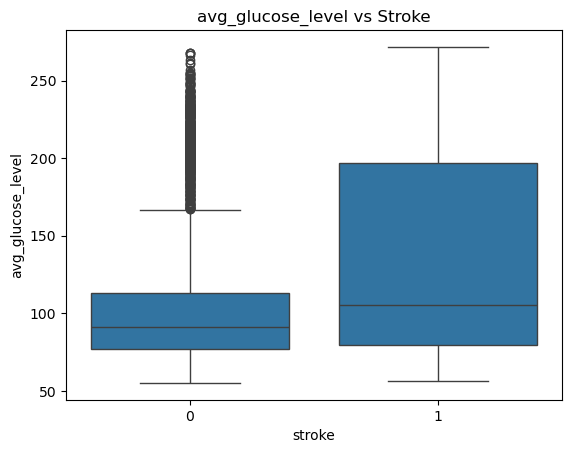

In [90]:
#Numerical Variables
numerical_cols = ['age', 'bmi', 'avg_glucose_level']
for col in numerical_cols:
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} vs Stroke")
    plt.show()

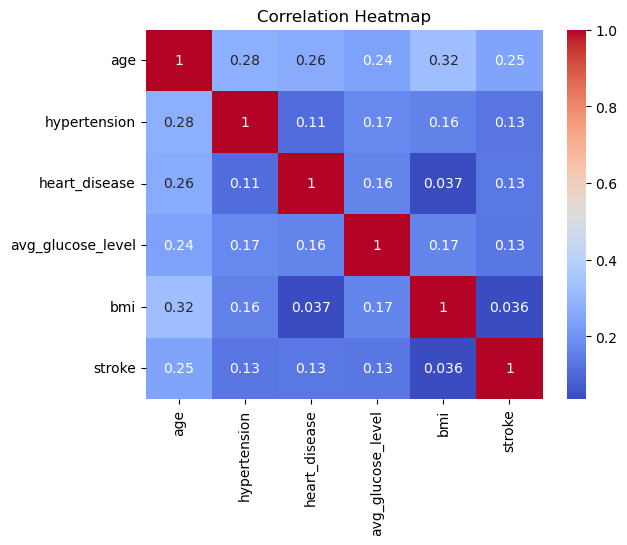

In [92]:
sns.heatmap(df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr(), annot = True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature Engineering: 

In [96]:
#Feature Engineering: combining age groups and bmi into groups 
bins_age = [0,30,45,60,75,100]
labels_age = ['0-30', '31-45', '46-60', '61-75', '76+']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_log,avg_glucose_level_log,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3.627004,5.436731,61-75
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,3.370738,5.314240,61-75
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.511545,4.672081,76+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3.566712,5.148831,46-60
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3.218876,5.165471,76+


In [98]:
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins = bins_bmi, labels = labels_bmi)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_log,avg_glucose_level_log,age_group,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3.627004,5.436731,61-75,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,3.370738,5.314240,61-75,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.511545,4.672081,76+,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3.566712,5.148831,46-60,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3.218876,5.165471,76+,Normal


In [100]:
#Stroke percentage by Age Group
age_group_counts = df.groupby('age_group', observed = True)['stroke'].mean()*100
#stroke percentage by BMI category
bmi_cat_counts = df.groupby('bmi_category', observed = True)['stroke'].mean()*100

print("\nStroke percentage by BMI Category:\n", bmi_cat_counts)


Stroke percentage by BMI Category:
 bmi_category
Underweight    0.286533
Normal         2.843217
Overweight     7.142857
Obese          5.104167
Name: stroke, dtype: float64


In [102]:
#Encode categorical variables
df_encoded = pd.get_dummies(df.drop('id', axis=1), drop_first=True)
print("\nEncoded columns:", df_encoded.columns)


Encoded columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'bmi_log', 'avg_glucose_level_log', 'gender_Male',
       'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'age_group_31-45', 'age_group_46-60', 'age_group_61-75',
       'age_group_76+', 'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese'],
      dtype='object')


Random Forest Model: doing a baseline model as a starting point
Based on results: highly imbalanced, (-5% stroke cases)- biased towards majority (stroke = No)


In [105]:
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [107]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [109]:
#Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
#predicting it
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



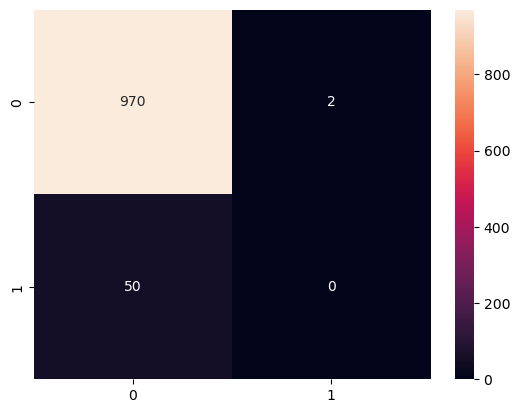

In [113]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()